# 1. 池化层

① 二维卷积层可以帮助我们检测图像物体边缘。

② 无论是原始图片，还是经过卷积核处理的中间特征，都是基于像素的基础进行的数学运算。

③ 实际图像里，我们感兴趣的物体不会总出现在固定像素位置：即使我们用三脚架固定相机去连续拍摄同一个物体也极有可能出现像素位置上的偏移。

④ 这会导致同一个物体的边缘对应的输出可能出现在卷积输出中的不同位置，进而对后面的模式识别造成不便。

⑤ 另外，绝大多数计算机视觉任务对图像处理终极目标是识别图片内的物体，所以不需要细致到对每个像素进行检测，只需要找到图片中物体的大概轮廓就好了。

⑥ 池化层可以缓解卷积层对位置的过度敏感性。

① 如下所示，例如1X2的卷积核[1,-1]，会使得下图中Y输出的第二列为1，其他为0，如果像素偏移，会导致边缘检测的1在其他位置输出，所以说卷积对像素的位置是非常敏感的。

② 这里本质上讲的是池化层对于像素偏移的容忍性。

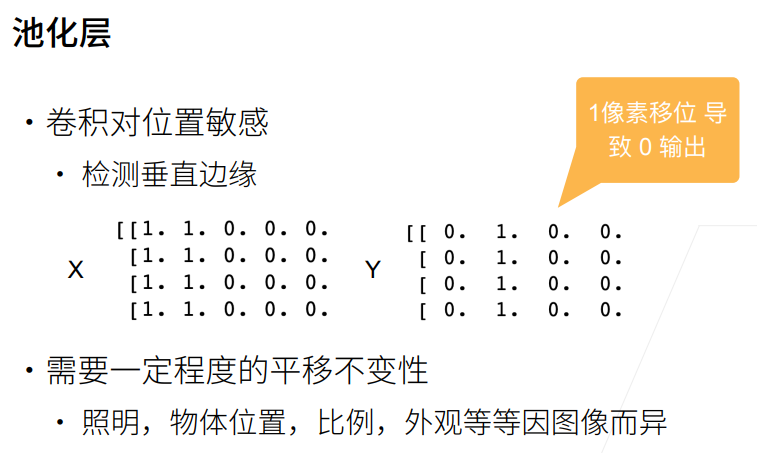

# 2. 二维最大池化

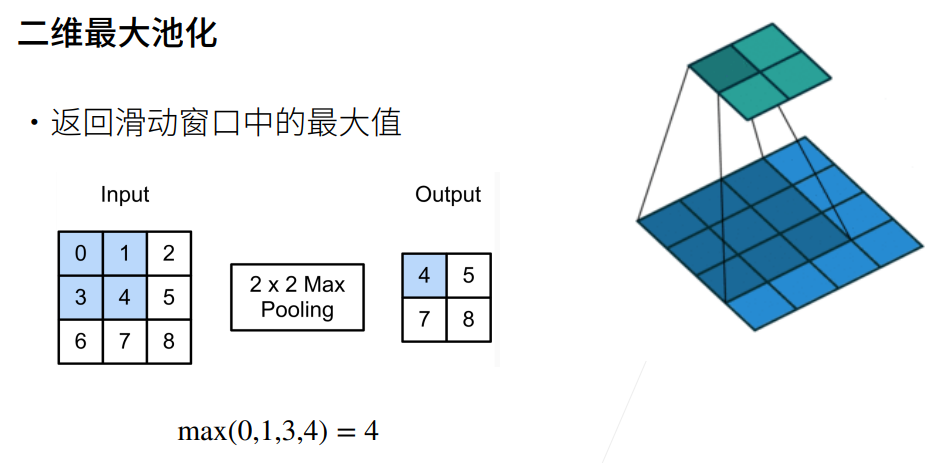

① 卷积输出上作用一次2X2池化，如下图所示。

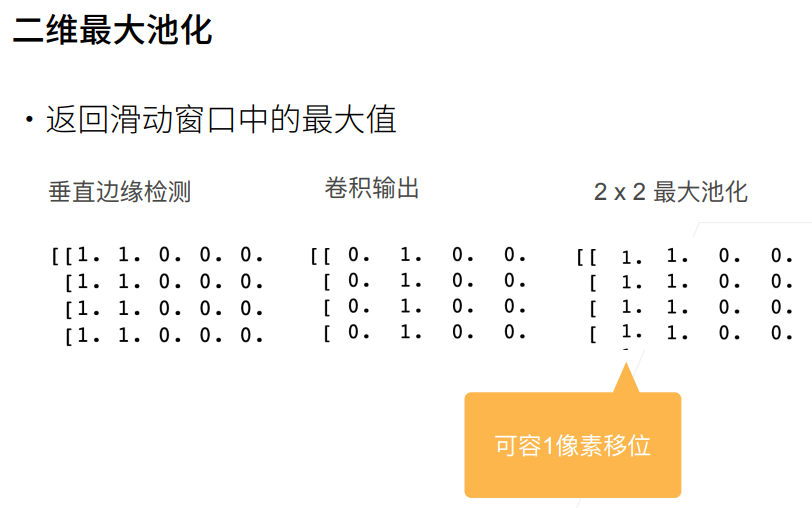

# 3. 填充、步幅与多个通道

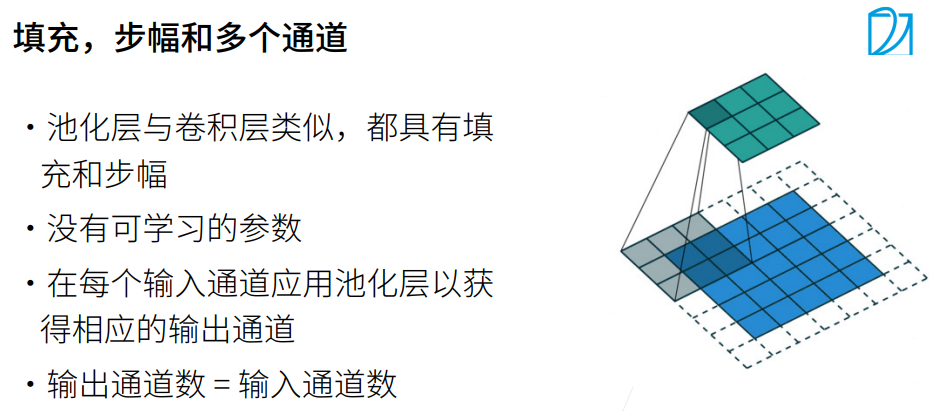

# 4. 平均池化层

① 平均池化层相对最大池化层有柔和的效果。

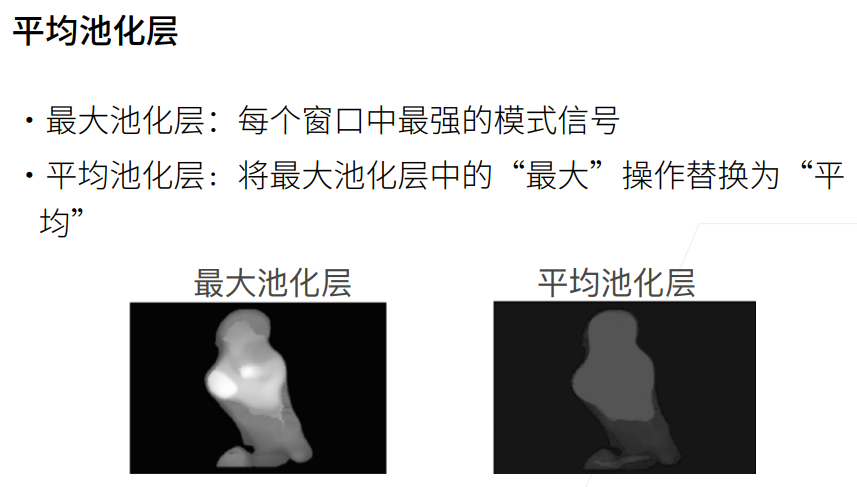

# 5. 总结

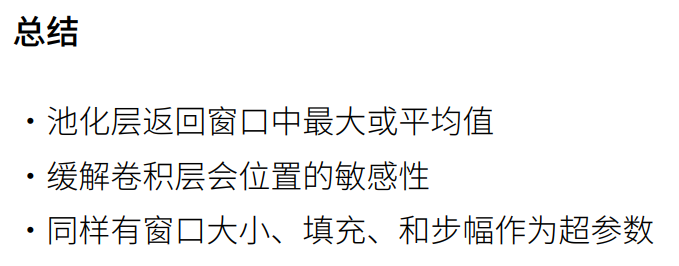

# 1. 池化层（使用自定义）

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

# 实现池化层的正向传播
def pool2d(X, pool_size, mode='max'):  # 拿到输入，池化窗口大小
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1)) # 输入的高减去窗口的高，再加上1，这里没有padding
    for i in range(Y.shape[0]): # 行遍历
        for j in range(Y.shape[1]): # 列遍历
            if mode == 'max':
                Y[i,j] = X[i:i + p_h, j:j + p_w].max()
            elif mode == 'avg':
                Y[i,j] = X[i:i + p_h, j:j + p_w].mean()
    return Y

# 验证二维最大池化层的输出
X = torch.tensor([[0.0,1.0,2.0],[3.0,4.0,5.0],[6.0,7.0,8.0]])
print(pool2d(X, (2,2)))

# 验证平均池化层
print(pool2d(X, (2,2), 'avg')) 

# 填充和步幅
X = torch.arange(16,dtype=torch.float32).reshape((1,1,4,4)) 
print(X)
pool2d = nn.MaxPool2d(3) # 深度学习框架中的步幅默认与池化窗口的大小相同，下一个窗口和前一个窗口没有重叠的
pool2d(X)

# 填充和步幅可以手动设定
pool2d = nn.MaxPool2d(3,padding=1,stride=2)
print(pool2d(X))

# 设定一个任意大小的矩形池化窗口，并分别设定填充和步幅的高度和宽度
pool2d = nn.MaxPool2d((2,3),padding=(1,1),stride=(2,3))
print(pool2d(X))

# 池化层在每个通道上单独运算
X = torch.cat((X,X+1),1)
print(X.shape) # 合并起来，变成了1X2X4X4的矩阵
print(X)

pool2d = nn.MaxPool2d(3,padding=1,stride=2)
print(pool2d(X))

tensor([[4., 5.],
        [7., 8.]])
tensor([[2., 3.],
        [5., 6.]])
tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])
tensor([[[[ 5.,  7.],
          [13., 15.]]]])
tensor([[[[ 1.,  3.],
          [ 9., 11.],
          [13., 15.]]]])
torch.Size([1, 2, 4, 4])
tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])
tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])
